In [1]:
import incense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.realpath(".."))
import util_funcs
from copy import deepcopy
from addict import Dict

In [2]:
runs = util_funcs.get_sacred_runs()

In [3]:
successful_run_params = {"status":"COMPLETED", "experiment.name":"gender_predict_conv_gridsearch", "num_files":None, 'result.history': {'$exists':True}, '$or': [{'config.use_random_ensemble': False}, {'config.use_random_ensemble': {"$exists": False}}]}

In [4]:
total = runs.find(successful_run_params).count()
total

/home/ms994/miniconda3/envs/keras-redo/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


265

In [5]:
allResults = Dict()

In [29]:
bestValScore = 10000
bestResult = None
bestCheatScore =  0
bestCheatResult = None
index = -1
cheatIndex = -1
for i in range(total):
    result = Dict(runs.find(successful_run_params)[i])
    allResults[i].config = result.config
    allResults[i].bestValScore = min(result.result.history.val_loss)
    allResults[i].history = result.result.history
    if (len(result.result.history["val_loss"]) != 0 and min(result.result.history["val_loss"]) < bestValScore):
        bestValScore = min(result.result.history["val_loss"])
        bestResult = allResults[i]
        index=i
    if (result.result.test_scores.auc > bestCheatScore):
        bestCheatScore = result.result.test_scores.auc
        bestCheatResult = allResults[i]
        cheatIndex = i
    allResults[i].testScore = result.result.test_scores

In [33]:
bestValScore, index,  bestResult,

(0.6007981523871422,
 114,
 {'config': {'batch_size': 64,
   'conv_spatial_filter': [3, 3],
   'conv_temporal_filter': [2, 3],
   'dropout': 0.25,
   'lr': 0.0001,
   'max_length': 500,
   'max_pool_size': [2, 2],
   'max_pool_stride': [1, 2],
   'model_name': 'A1A6D77C361B8D6F3FCBB196131A8AF0.h5',
   'n_process': 6,
   'num_conv_spatial_layers': 7,
   'num_conv_temporal_layers': 7,
   'num_epochs': 500,
   'num_files': None,
   'num_spatial_filter': 300,
   'num_temporal_filter': 300,
   'patience': 20,
   'precached_pkl': 'train_data.pkl',
   'precached_test_pkl': 'test_data.pkl',
   'ref': '01_tcp_ar',
   'seed': 169492458,
   'test_split': 'dev_test',
   'train_split': 'train',
   'use_cached_pkl': True,
   'use_early_stopping': True,
   'use_vp': False,
   'validation_size': 0.2},
  'bestValScore': 0.6007981523871422,
  'testScore': {'acc': 0.5536649214659686,
   'auc': 0.5895302988378528,
   'f1': 0.624862486248625},
  'history': {'binary_accuracy': [0.52001953125,
    0.5078125,

In [34]:
bestCheatScore, cheatIndex, bestCheatResult

(0.6516152462645268,
 119,
 {'config': {'batch_size': 64,
   'conv_spatial_filter': [2, 2],
   'conv_temporal_filter': [2, 3],
   'dropout': 0.25,
   'lr': 5e-05,
   'max_length': 500,
   'max_pool_size': [2, 2],
   'max_pool_stride': [1, 2],
   'model_name': '4DAA821EEF60686F59016A7FE1452863.h5',
   'n_process': 1,
   'num_conv_spatial_layers': 7,
   'num_conv_temporal_layers': 7,
   'num_epochs': 500,
   'num_files': None,
   'num_spatial_filter': 200,
   'num_temporal_filter': 300,
   'patience': 20,
   'precached_pkl': 'train_data.pkl',
   'precached_test_pkl': 'test_data.pkl',
   'ref': '01_tcp_ar',
   'seed': 44124645,
   'test_split': 'dev_test',
   'train_split': 'train',
   'use_cached_pkl': True,
   'use_early_stopping': True,
   'use_vp': False,
   'validation_size': 0.2},
  'bestValScore': 0.6873899772763252,
  'testScore': {'acc': 0.7447643979057592,
   'auc': 0.6516152462645268,
   'f1': 0.8299912816041848},
  'history': {'binary_accuracy': [0.50146484375,
    0.504394531

sbatch -n 1 --mem-per-cpu 32G -t 12:00:00 -p gpu --gres=gpu:1 run.sh use_vp=False lr=0.001 num_spatial_filter=300 num_temporal_filter=300 num_conv_spatial_layers=7 num_conv_temporal_layers=7 num_epochs=100 patience=20 conv_spatial_filter_3_3 conv_temporal_filter_2_3 use_cached_pkl=True model_name=$(hexdump -n 16 -e '4/4 "%08X" 1 "\n"' /dev/urandom).h5 simple_ensemble_samples n_process=8 batch_size=32 -D

In [8]:
runs.find(successful_run_params)[0]

{'_id': 2934,
 'experiment': {'name': 'gender_predict_conv_gridsearch',
  'base_dir': '/home/ms994/dbmi_eeg_clustering',
  'sources': [['clinical_text_analysis.py',
    ObjectId('5d2d5864eadb9a19a004b3ab')],
   ['constants.py', ObjectId('5d27d20008dbf0f57da81b62')],
   ['data_reader.py', ObjectId('5d2e0f3d396ada4c0d3e0c00')],
   ['keras_models/__init__.py', ObjectId('5d2c2b93fc0fc7746d130fa5')],
   ['keras_models/dataGen.py', ObjectId('5d2d5865eadb9a19a004b3af')],
   ['keras_models/vanPutten.py', ObjectId('5d2df305fc0fc77d11b17dcf')],
   ['predictGenderConvExp.py', ObjectId('5d2e3551396ada0cd357686e')],
   ['util_funcs.py', ObjectId('5d2e0d9deadb9a2f3caf61c0')],
   ['wf_analysis/__init__.py', ObjectId('5d24f280bef7d40ea2ab7519')],
   ['wf_analysis/datasets.py', ObjectId('5d293e67f2bc6e6e86d41863')]],
  'dependencies': ['addict==2.2.1',
   'Keras==2.2.4',
   'numpy==1.16.2',
   'pandas==0.24.2',
   'sacred==0.7.5',
   'scikit-learn==0.20.3'],
  'repositories': [{'url': 'git@github.com:S

In [42]:
trainAcc = allResults[index].history["loss"]
valAcc = allResults[index].history["val_loss"]

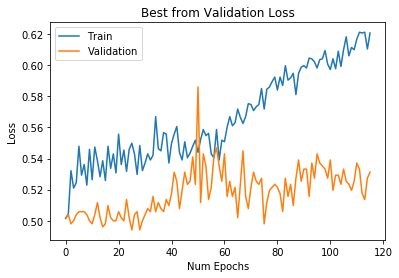

In [46]:
plt.plot(trainAcc)
plt.plot(valAcc)
plt.ylabel("Loss")
plt.xlabel("Num Epochs")
plt.title("Best from Validation Loss")
plt.legend(["Train", "Validation"])

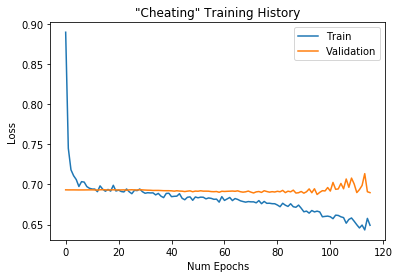

In [59]:
trainAcc = allResults[cheatIndex].history["loss"]
valAcc = allResults[cheatIndex].history["val_loss"]
plt.plot(trainAcc)
plt.plot(valAcc)
plt.ylabel("Loss")
plt.xlabel("Num Epochs")
plt.title('"Cheating" Training History')
plt.legend(["Train", "Validation"])

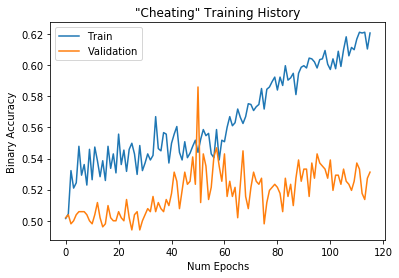

In [58]:
trainAcc = allResults[cheatIndex].history["binary_accuracy"]
valAcc = allResults[cheatIndex].history["val_binary_accuracy"]
plt.plot(trainAcc)
plt.plot(valAcc)
plt.title('"Cheating" Training History')
plt.ylabel("Binary Accuracy")
plt.xlabel("Num Epochs")
plt.legend(["Train", "Validation"])

In [54]:
trainAcc

{}

In [35]:
import seaborn as sn

In [68]:
allValScores = []
for key, result in allResults.items():
    allValScores.append(max(result.history["val_binary_accuracy"]))

Text(0, 0.5, 'freq')

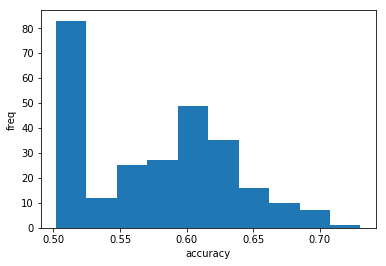

In [70]:
plt.hist(allValScores)
plt.xlabel("accuracy")
plt.ylabel("freq")